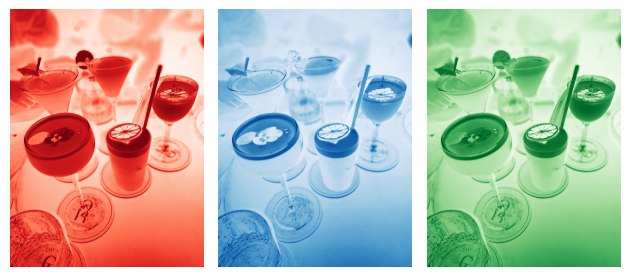

In [31]:
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt
data = iio.imread('AnhLab1.jpg')

# Hiển thị ảnh
red = data[:, :, 0]
green = data[:, :, 1]
blue = data[:, :, 2]
iio.imwrite('AnhLab1-bai1-red.jpg',red)
iio.imwrite('AnhLab1-bai1-blue.jpg',blue)
iio.imwrite('AnhLab1-bai1-green.jpg',green)
# Hiển thị từng kênh

plt.subplot(1, 3, 1)
plt.imshow(red, cmap='Reds')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(blue, cmap='Blues')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(green, cmap='Greens')
plt.axis('off')

plt.tight_layout()
plt.show()

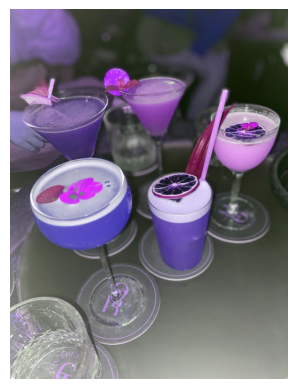

: 

In [ ]:
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt
import colorsys
rgb = iio.imread('AnhLab1.jpg')

swapped = np.zeros_like(rgb)
swapped[:, :, 0] = rgb[:, :, 1]  # Red <- Green
swapped[:, :, 1] = rgb[:, :, 2]  # Green <- Blue
swapped[:, :, 2] = rgb[:, :, 0]  # Blue <- Red

iio.imwrite('AnhLab1-bai2.jpg', swapped)

plt.imshow(swapped)
plt.axis('off')
plt.show()

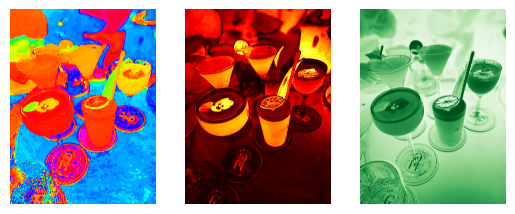

In [ ]:
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt
import colorsys
rgb = iio.imread('AnhLab1.jpg')
height, width, _ = rgb.shape
h = np.zeros((height, width))
s = np.zeros((height, width))
v = np.zeros((height, width))

for i in range(height):
    for j in range(width):
        r, g, b = rgb[i, j]
        h[i, j], s[i, j], v[i, j] = colorsys.rgb_to_hsv(r, g, b)

h = (h * 255).astype(np.uint8)
s = (s * 255).astype(np.uint8)
v = (v * 255).astype(np.uint8)

iio.imwrite('AnhLab1-bai3-h.jpg',h)
iio.imwrite('AnhLab1-bai3-s.jpg',s)
iio.imwrite('AnhLab1-bai3-v.jpg',v)

plt.subplot(1, 3, 1)
plt.imshow(h, cmap='hsv')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(s, cmap='hot')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(v, cmap='Greens')
plt.axis('off')

plt.show ()

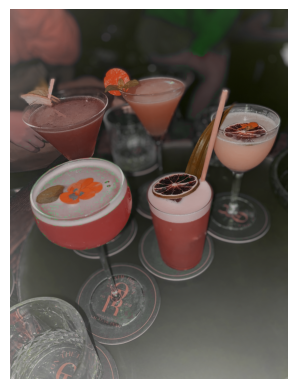

In [ ]:
import numpy as np
import imageio.v2 as iio
import matplotlib.pyplot as plt
import colorsys

rgb = iio.imread('AnhLab1.jpg') / 255.0  # Chuẩn hóa về [0,1]

height, width, _ = rgb.shape

hsv = np.zeros_like(rgb)

for i in range(height):
    for j in range(width):
        r, g, b = rgb[i, j]
        h, s, v = colorsys.rgb_to_hsv(r, g, b)
        
        h = (h / 3.0) % 1.0         
        v = min(v * 0.75, 1.0)       
        hsv[i, j] = [h, s, v]

new_rgb = np.zeros_like(rgb)
for i in range(height):
    for j in range(width):
        h, s, v = hsv[i, j]
        r, g, b = colorsys.hsv_to_rgb(h, s, v)
        new_rgb[i, j] = [r, g, b]

new_rgb_uint8 = (new_rgb * 255).astype(np.uint8)
iio.imwrite('AnhLab1-bai4.jpg', new_rgb_uint8)

plt.imshow(new_rgb_uint8)
plt.axis('off')
plt.show()


In [ ]:
import os
import imageio.v2 as iio
import numpy as np
from scipy.ndimage import uniform_filter

input_folder = 'Exercise'
output_folder = 'Exercise_Output'
os.makedirs(output_folder, exist_ok=True)

for filename in os.listdir(input_folder):
    if filename.lower().endswith(('.jpg', '.png', '.jpeg', '.bmp')):
        filepath = os.path.join(input_folder, filename)
        img = iio.imread(filepath)

        # Áp dụng mean filter (mặc định size=3)
        if img.ndim == 3:  # Ảnh màu
            filtered_img = np.zeros_like(img)
            for c in range(3):  # Lọc từng kênh R, G, B
                filtered_img[:, :, c] = uniform_filter(img[:, :, c], size=3)
        else:  # Ảnh xám
            filtered_img = uniform_filter(img, size=3)

        # Lưu ảnh
        output_path = os.path.join(output_folder, filename)
        iio.imwrite(output_path, filtered_img)

        print(f'Đã xử lý: {filename}')


Đã xử lý: anh.jpg
